# AI Fall 2022 - A4 - Decision Tree
## Your info

**Student Name:** Abolfazl Eshagh

**Student Id:** 99101105

## Practical Question - Decision Tree (25 + 5 points)
In this question you will first write a program to find an appropriate order of features for training a decision tree based on information gain. In the second part, you will use existing implementations to train and tune a classifier using GridSearch on the given dataset. And try to finish this in <15 mins.

### Import
Import the libraries you need in the next cell.

In [1]:
import pandas as pd
import numpy as np

# ...

### Part A (20 points)
Consider the following dataframe and answer the following questions:

In [2]:
df = pd.DataFrame({
    'Race': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Sex': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
    'Age': [43.0, 72.0, 4.0, 59.0, 34.0, 55.0, 41.0, 39.0, 6.0, 77.0, 67.0, 35.0, 45.0, 39.0, 32.0, 57.0, 99.0, 68.0, 47.0, 28.0],
    'BMI': [25.803, 33.394, 20.278, 32.918, 30.743, 37.734, 23.725, 20.722, 19.452, 22.044, 17.481, 18.918, 28.578, 19.214, 23.562, 23.446, 21.872, 20.691, 25.471, 25.82],
    'Smoker': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    'Label': [False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False],
})

df.head()

,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,43.0,25.803,1.0,False
1,2.0,2.0,72.0,33.394,0.0,True
2,1.0,2.0,4.0,20.278,1.0,False
3,1.0,2.0,59.0,32.918,0.0,False
4,1.0,2.0,34.0,30.743,1.0,False


#### QA.1 (10 points)
Complete the following function that calculates and returns the list of features based on their information gain.

In [47]:
'''
                                                    NOTE 
    
    that the code below is perfectly capable to get the order for the whole tree, but is now set to get only the order
    for the first node(depth)
'''

def feature_order(X_data, y_data):
    '''
    Calculate the best feature order
    for training a decision tree based on
    information gain.
    Input:
        X_data (pd.DataFrame) contains data features
        y_data (pd.Series) contains the labels
    Output:
        order (list[str]): The `X_data` columns in the correct order
    '''

    #first of all please read the comment mentioned before defining the function
    order = list(X_data.columns)
    listOfRows = [X_data]
    toOrder = []
    for j in range(len(X_data.columns)-1):

        feature_utility = 0
        feature_utility_list = []
        orderList = []
        for i in range(len(X_data.columns)-1):
            row_utility = 0
            feature = X_data.columns[i]
            for rows in listOfRows:
                value_entropy = 0
                unique_values = rows[feature].unique().tolist()
                weighted_entropy = 0
                for value in unique_values:
                    labels = rows[rows[feature] == value]['Label']
                    true_label = [label for label in labels if label == True]
                    true_sum = len(true_label)
                    p_true = true_sum / len(labels)
                    if p_true != 0 and p_true != 1:
                        entropy = -p_true*np.log2(p_true) -(1-p_true)*np.log2(1-p_true)
                    else :
                        entropy = 0
                    weight = len(labels)/len(rows['Label'])
                    weighted_entropy += weight*entropy
                row_utility += weighted_entropy
            feature_utility_list.append(row_utility)
            orderList.append(row_utility)
        if j == 0:
            order = [x for _, x in sorted(zip(orderList, X_data.columns[:-1]))]
        min_index = feature_utility_list.index(min(feature_utility_list))
        best_feature = X_data.columns[min_index]
        toOrder.append(best_feature)
        hold = listOfRows
        listOfRows = []

        for rows in hold:
            unique_values_BF = rows[best_feature].unique().tolist()
            for value in unique_values_BF:
                labels = rows[rows[best_feature] == value]['Label']
                true_label = [label for label in labels if label == True]
                true_sum = len(true_label)
                p_true = true_sum / len(labels)
                if p_true != 0 and p_true != 1:
                    listOfRows.append(rows.loc[rows[best_feature] == value])

    return order

feature_order(df, df.Label)

['Age', 'BMI', 'Race', 'Smoker', 'Sex']

#### QA.2 (5 points)
What are some of the effective approaches to prevent the tree from overfitting? (three approaches)

<font color=#183364>
    <i>
        Answer.
        <ol>
            <li>Pruning</li>
            <li>Boosting</li>
            <li>Random forest</li>
        </ol>
    </i>
</font>

#### QA.3 (5 points)
About the `Age` feature which is an integer-valued input attribute, how can a tree utilize it for classification? Write a small piece of code to find the answer for this specific column.

<font color=#183364>
    <i>
        Answer.
    </i>
</font>

In [31]:
# Your code here
'''
Every split in a decision tree is based on a feature. 
If the feature is categorical, the split is done with the elements belonging to a particular class. 
If the feature is contiuous, the split is done with the elements higher than a threshold. 
At every split, the decision tree will take the best variable at that moment. 
This will be done according to an impurity measure with the splitted branches. 
And the fact that the variable used to do split is categorical or continuous is irrelevant 
(in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).
'''
unique_values = df['Age'].unique().tolist()
unique_values.sort()
cluster_feature = []
cluster_feature.append([unique_values[0]])
threshold = 4
for i in range(len(unique_values)):
    if unique_values[i] - cluster_feature[-1][-1] < threshold and cluster_feature[-1][-1] - unique_values[i] != 0 :
        cluster_feature[-1].append(unique_values[i])
    elif cluster_feature[-1][-1] - unique_values[i]!=0:
        cluster_feature.append([unique_values[i]])
print(cluster_feature)

[[4.0, 6.0], [28.0], [32.0, 34.0, 35.0], [39.0, 41.0, 43.0, 45.0, 47.0], [55.0, 57.0, 59.0], [67.0, 68.0], [72.0], [77.0], [99.0]]


### Part B (10 points)
In this part you will learn more about [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and use it to train a classifier and tune its parameters.

#### QB.1 (5 points)
For measuring the _accuracy_ of your models, choose a subset of the given dataset as your validation set (Check out [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [32]:
X = (df.loc[:, df.columns != 'Label'].to_numpy())
# from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
        X, df['Label'], test_size=0.33, random_state=45)

In [33]:
# Your code here
## Set your own hyperparameters below, such as:
dt_hyperparams = {
    'min_samples_split': 2,
    'criterion': 'entropy',
    'min_samples_leaf':1
    # 'max_features':
}
clf = DecisionTreeClassifier(min_samples_split=dt_hyperparams['min_samples_split'],criterion=dt_hyperparams['criterion'],min_samples_leaf=dt_hyperparams['min_samples_leaf'])
clf = clf.fit(X_train, y_train)
print(clf.predict(X_test))
print(y_test)
print(accuracy_score(y_test, clf.predict(X_test)))

## Train the model and check its performance

[False False False False False False False]
12    False
16    False
19    False
2     False
15    False
17    False
10     True
Name: Label, dtype: bool
0.8571428571428571


#### QB.2 (5 points)
Take a look at customizable and potentially useful input params of the model, define a range for each of their values, and use GridSearch (Feel free to implement/[import](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) it) and find a set of hyperparametetrs that work best among your candidates.

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 198 candidates, totalling 594 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


#### QB.3 (5 extra points)
Visualize the tree splits and interpret it (Hint: Search about `IPython.display.Image`, `pydotplus`, `StringIO`, and `export_graphviz`).

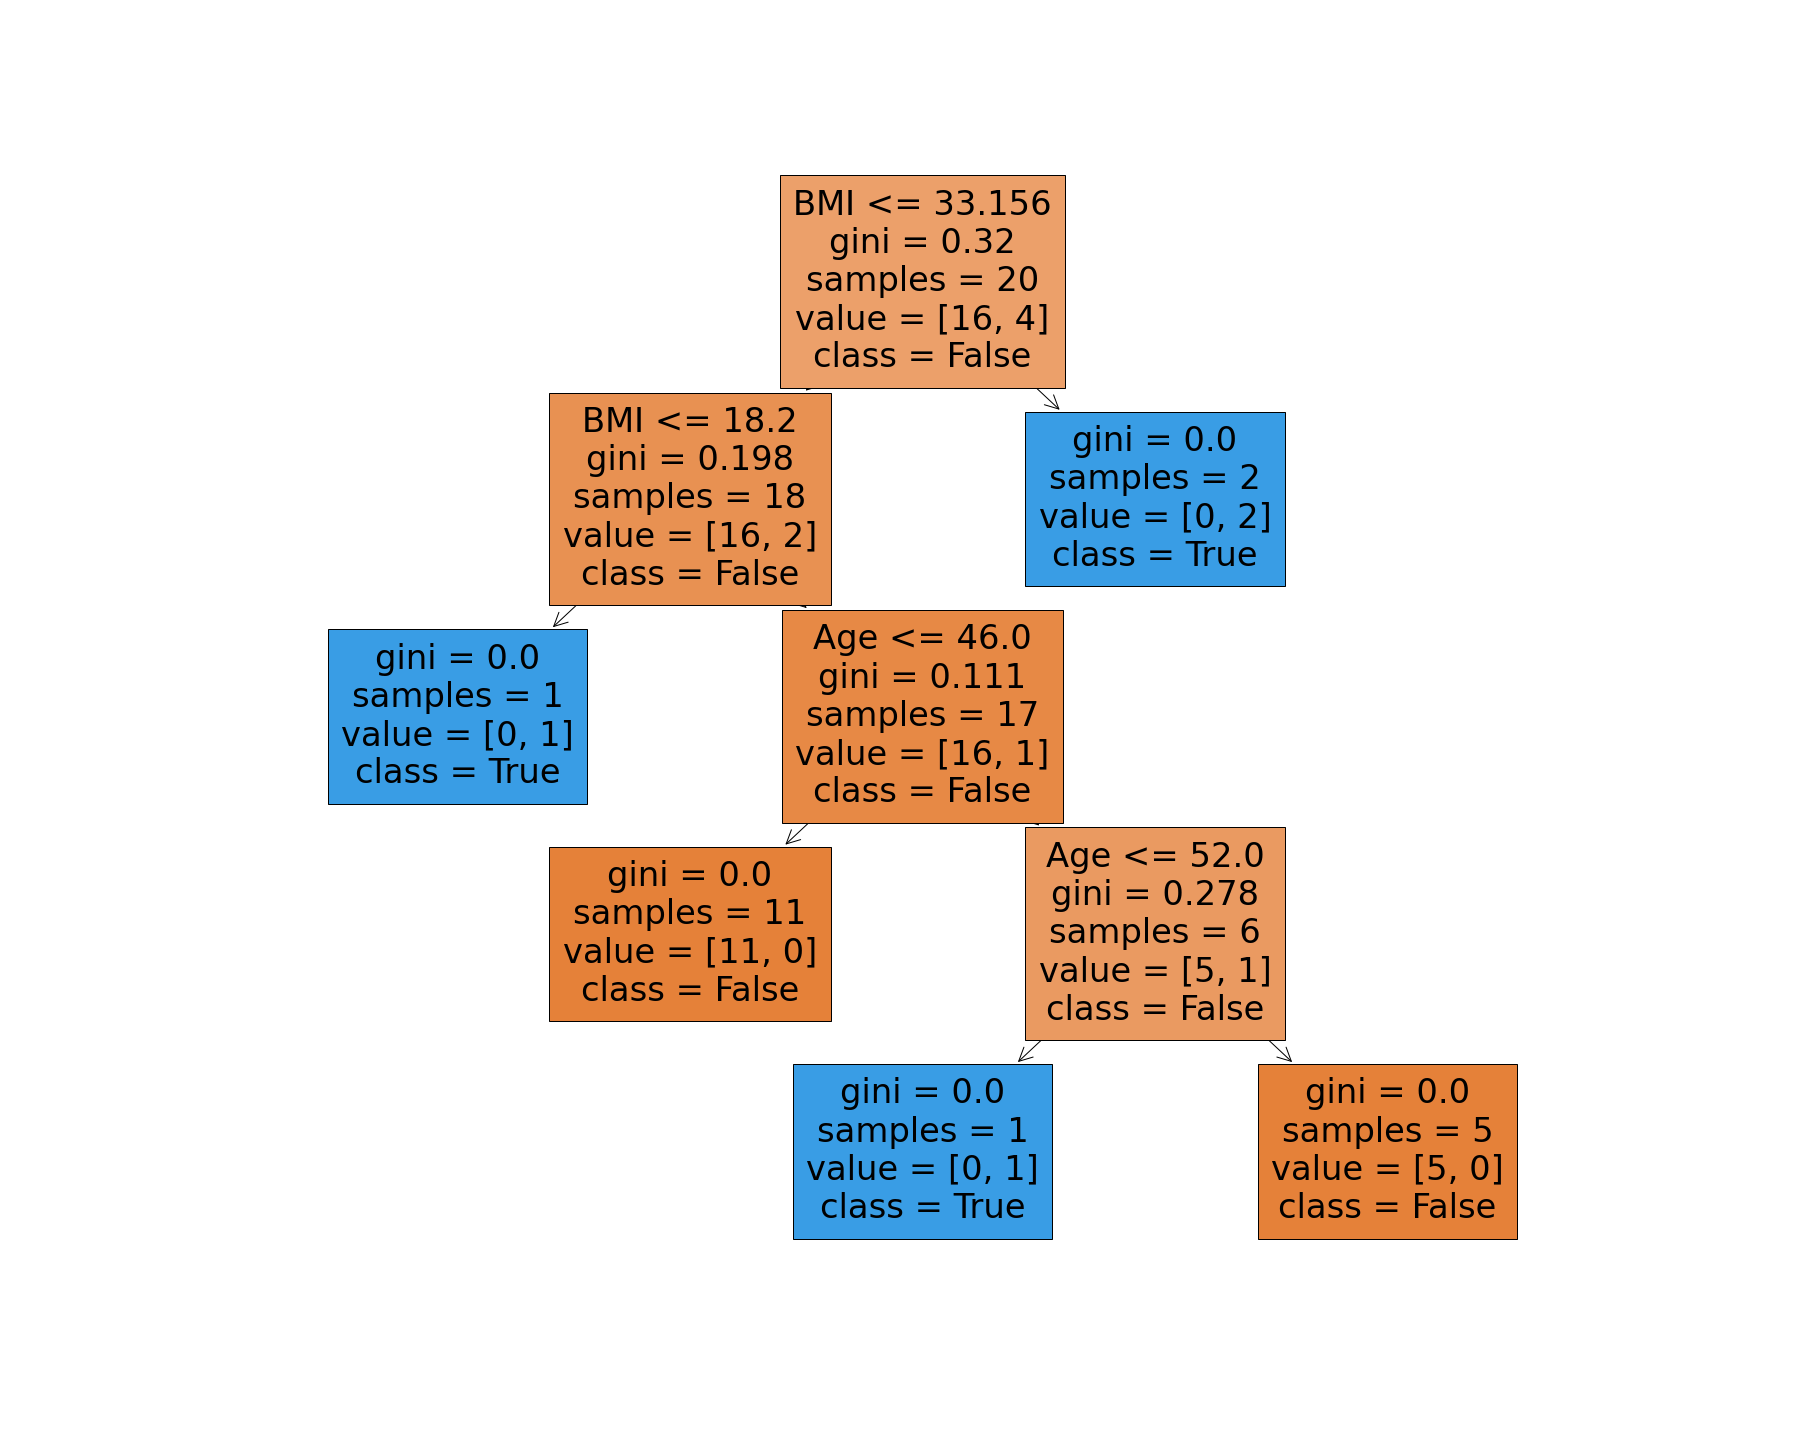

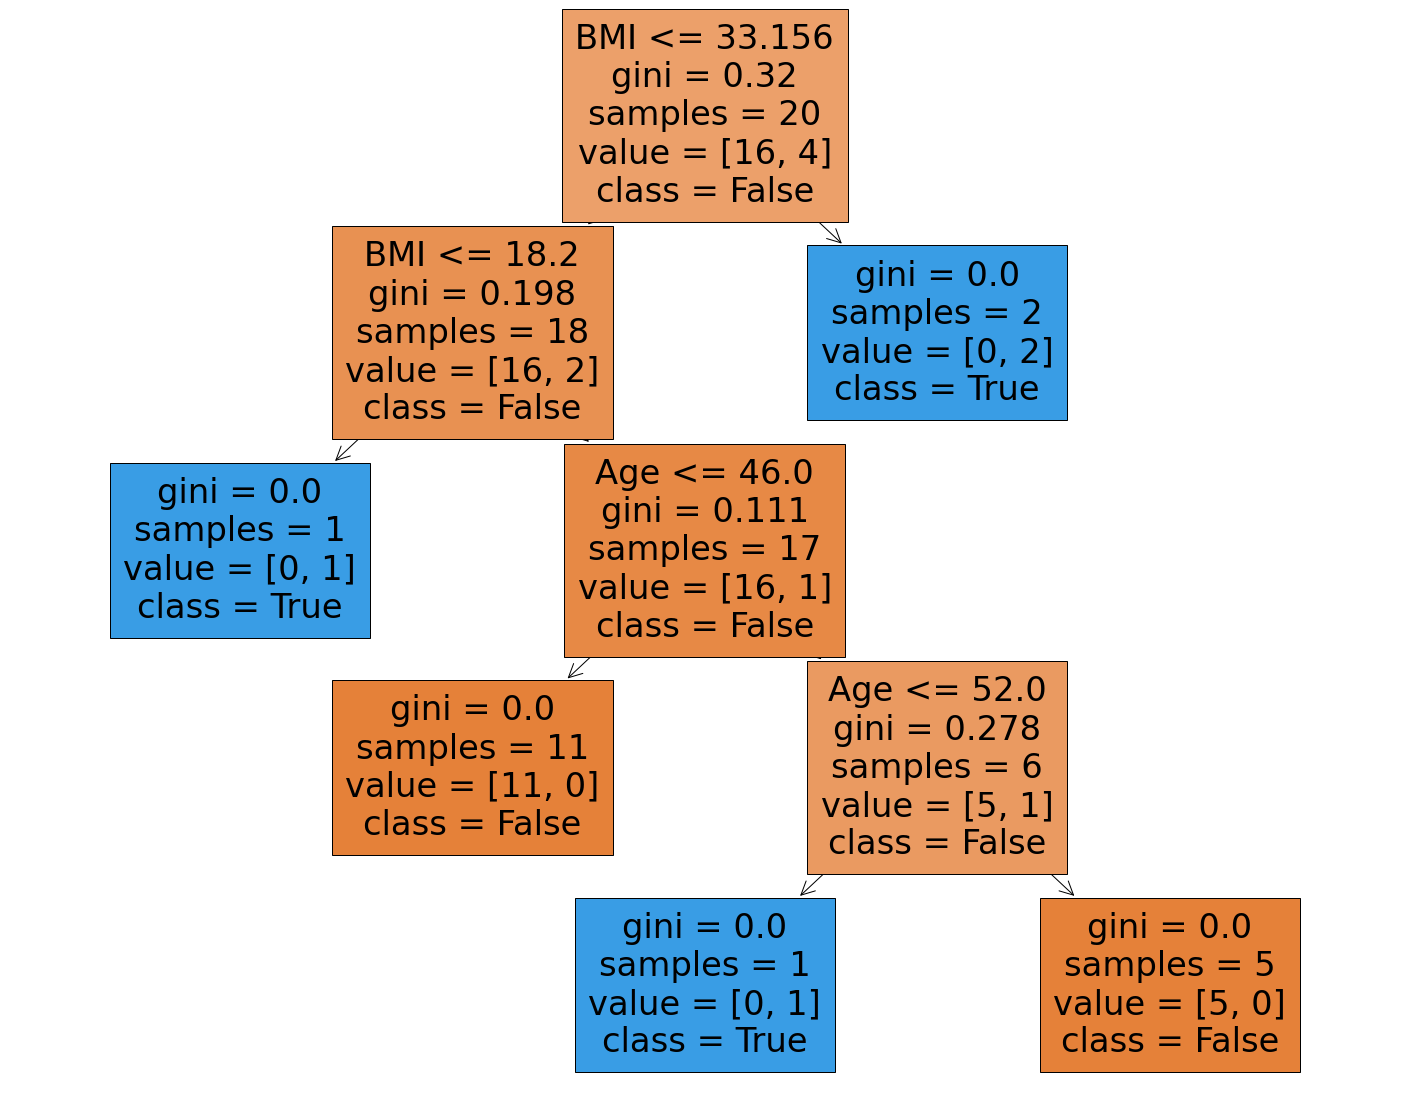

In [46]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
cNames = []
for i in range(len(df['Label'])):
    if df['Label'][i] == True:
        cNames.append("True")
    else:
        cNames.append("False")
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=df.columns,
                   class_names=cNames,
                   filled=True)
fig.savefig("tree.png")
from IPython.display import Image
#in jupyter notebook there is no need for the line below, because it will make the plot be printed a second time, but in any
#other ide like pycharm or vsc it is needed
Image(filename = 'tree.png', width=1000, height=1000)  